### A Single Trial

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import time
from multi_arm import Arm, monte_carlo_simulation, k_arm_bandit_mc, plot_history
import seaborn
# 5-arm figure: seed 6, 8, 11
# 2-arm figure: seed 10

seed = 11
np.random.seed(seed)

In [2]:
ctrs = [0.04, 0.048, 0.03, 0.037, 0.044]
# ctrs = [0.04, 0.05]

true_winner_idx = np.argmax(ctrs)
print("true_winner_idx:", true_winner_idx, ctrs)

(winner_idx, est_ps, wins, traffic, history_ctr, history_p, history_idx, history_alphas, history_betas,
 values_remaining) = k_arm_bandit_mc(ctrs, alpha=0.05, burn_in=1400)

# plt.hist(values_remaining, bins=50)
# plt.show()

true_winner_idx: 1 [0.04, 0.048, 0.03, 0.037, 0.044]
Winning arm 4 beats second arm at iteration 14385


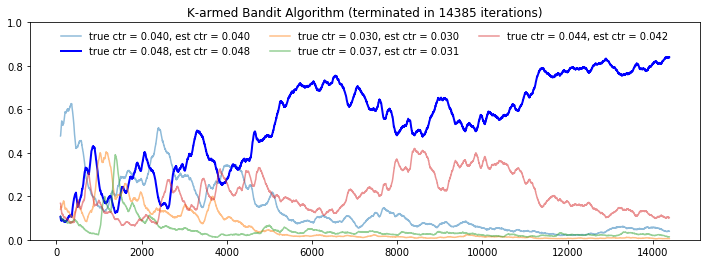

In [3]:
plot_history(ctrs, est_ps, history_p, 
             title="K-armed Bandit Algorithm (terminated in %i iterations)"%sum(traffic), rolling=100)

In [4]:
# fname = '%i_armed_bandit_mc_seed_%i.png'%(len(ctrs), seed)
# plot_history(ctrs, est_ps, history_p, 
#              title="K-armed Bandit Algorithm (terminated in %i iterations)"%sum(traffic), 
#              fname=fname, rolling=100, transparent=False)

In [5]:
conversion = 100 * sum(wins) / sum(traffic)
baseline = 100 * np.mean(ctrs)
print("net conversion: %i / %i = %.2f%%, baseline %.2f%%"%(sum(wins), sum(traffic), conversion, baseline))

net conversion: 620 / 14385 = 4.31%, baseline 3.98%


Text(0.5, 1.0, 'Mistakes 5-Armed Experiment')

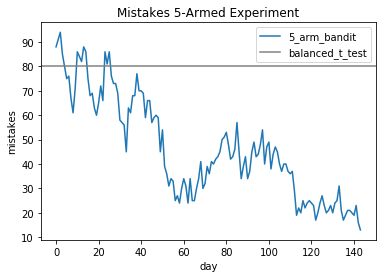

In [6]:
batch = 100
mistake = []
for i in range(len(history_idx) // batch + 1):
    idx_start, idx_end = i * batch, min(len(history_idx), (i + 1) * batch)
    mistake.append(sum(history_idx[idx_start : idx_end] != true_winner_idx))
plt.plot(list(range(len(history_idx) // batch + 1)), mistake)
plt.xlabel('day')
plt.ylabel('mistakes')
plt.axhline(y=batch * (1 - 1 / len(ctrs)), color='grey')
plt.legend(['%i_arm_bandit'%len(ctrs), 'balanced_t_test'])
plt.title("Mistakes %i-Armed Experiment"%(len(ctrs)))
# plt.savefig("outputs/mistakes_%i_arm_bandit_seed_%i.png"%(len(ctrs), seed))

### True Positive Rate

In [7]:
start = time()

ctrs = [0.04, 0.05]
true_winner_idx = np.argmax(ctrs)
n_trials = 100

cols = ["winner_idx", "wins", "traffic"]
df = pd.DataFrame(columns=cols)

for i in range(n_trials):
    winner_idx, _, wins, traffic, _, _, _, _, _, _ = k_arm_bandit_mc(ctrs=ctrs, burn_in=3000, alpha=0.01, silent=True)
    df = df.append({key : val for key, val in zip(cols, [winner_idx, sum(wins), sum(traffic)])}, ignore_index=True)
    
    success_rate = 100 * sum(df.winner_idx == true_winner_idx) / len(df)
    print("Progress %.2f%%, success rate %.2f%%..."%(100 * (i + 1) / n_trials, success_rate), end="\r")
print("probability of finding winner: %.2f%%"%success_rate)

end = time()
print("time elapsed: %.2fs"%(end - start))

probability of finding winner: 91.00%...
time elapsed: 115.78s


In [8]:
df["conversion"] = df.wins / df.traffic
# df.to_csv("outputs/df_bandit.csv")

In [9]:
# 0.051 alpha
# average iteration 5122.79, median 3485.00, std 3507.18
# average conversion rate: 0.0473
# "probability of finding winner: 0.922
# df.to_csv("outputs/df_bandit_alpha_0.01.csv")

In [10]:
# 0.05 alpha
# average iteration 3926.51, median 3010.00, std 2285.33
# average conversion rate: 0.0472
# "probability of finding winner: 0.892 
# df.to_csv("outputs/df_bandit_alpha_0.05.csv")

https://support.google.com/analytics/answer/2844870?hl=en

https://support.google.com/analytics/answer/2846882